# FAA Project - Part Three

## Load in packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', None)
%matplotlib Inline

## Load in Dataset

In [2]:
df = pd.read_csv('faa_cleaned_numerical_data.csv', index_col = 0)
df = df.drop(columns = ['I', 'ENROLID', 'NDCNUM', 'YEAR_x', 'YEAR_y'])
df.head()

,AGE_x,SEX,AGE_y,Infectious And Parastic Disease(A & B),Neoplasms(C),Neoplasms Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Connective Tissue(L),musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
0,54,2,55,0,0,0,3,1,2,0,0,0,5,0,3,0,0,0,0,4,0,0,0,2
111,50,1,51,6,0,3,5,1,0,0,1,1,6,0,0,0,0,0,0,5,0,0,0,1
145,54,2,55,0,0,0,2,0,5,0,1,1,0,0,0,0,0,0,0,12,1,0,0,2
239,62,1,63,2,0,1,5,0,0,0,1,3,0,0,0,5,0,0,0,5,0,1,0,0
262,13,2,14,0,0,0,7,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,2


In [3]:
df.shape

(5016, 24)

## Set Input Variables and Target Variable

In [4]:
X = df.drop(columns = ['Circulatory System(I)'], axis = 1).values
y = df['Circulatory System(I)']

## Import Sklearn Packages

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Split Training and Testing Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [52]:
X_train

array([[53,  2, 54, ...,  0,  1,  0],
       [24,  1, 25, ...,  0,  0,  2],
       [17,  1, 18, ...,  0,  0,  2],
       ...,
       [21,  2, 22, ...,  0,  0,  1],
       [61,  1, 62, ...,  0,  0,  1],
       [57,  1, 58, ...,  1,  0,  0]])

## Preprocessing, Scaling the data to be normalized

In [53]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

## Neural Network Model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Basic Model with out early stop and dropout

In [55]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
model.fit(x=X_train, y=y_train, epochs = 300 , validation_data=(X_test, y_test))

Epoch 1/300
126/126 [==============================] - 2s 2ms/step - loss: 0.6395 - val_loss: 13.3692
Epoch 2/300
126/126 [==============================] - 0s 800us/step - loss: 0.5807 - val_loss: 21.7847
Epoch 3/300
126/126 [==============================] - 0s 765us/step - loss: 0.5435 - val_loss: 28.0322
Epoch 4/300
126/126 [==============================] - 0s 767us/step - loss: 0.5321 - val_loss: 31.6117
Epoch 5/300
126/126 [==============================] - 0s 770us/step - loss: 0.5295 - val_loss: 30.6181
Epoch 6/300
126/126 [==============================] - 0s 766us/step - loss: 0.5270 - val_loss: 30.7397
Epoch 7/300
126/126 [==============================] - 0s 764us/step - loss: 0.5253 - val_loss: 31.9643
Epoch 8/300
126/126 [==============================] - 0s 767us/step - loss: 0.5233 - val_loss: 33.1900
Epoch 9/300
126/126 [==============================] - 0s 795us/step - loss: 0.5234 - val_loss: 33.2853
Epoch 10/300
126/126 [==============================] - 0s 778us/s

126/126 [==============================] - 0s 770us/step - loss: 0.4623 - val_loss: 21.7520
Epoch 80/300
126/126 [==============================] - 0s 770us/step - loss: 0.4617 - val_loss: 22.3749
Epoch 81/300
126/126 [==============================] - 0s 786us/step - loss: 0.4612 - val_loss: 22.2196
Epoch 82/300
126/126 [==============================] - 0s 769us/step - loss: 0.4598 - val_loss: 21.0451
Epoch 83/300
126/126 [==============================] - 0s 770us/step - loss: 0.4600 - val_loss: 20.9148
Epoch 84/300
126/126 [==============================] - 0s 761us/step - loss: 0.4591 - val_loss: 21.7497
Epoch 85/300
126/126 [==============================] - 0s 779us/step - loss: 0.4581 - val_loss: 18.3332
Epoch 86/300
126/126 [==============================] - 0s 761us/step - loss: 0.4599 - val_loss: 20.7929
Epoch 87/300
126/126 [==============================] - 0s 752us/step - loss: 0.4572 - val_loss: 20.2131
Epoch 88/300
126/126 [==============================] - 0s 771us/ste

126/126 [==============================] - 0s 752us/step - loss: 0.4275 - val_loss: 13.8950
Epoch 157/300
126/126 [==============================] - 0s 759us/step - loss: 0.4262 - val_loss: 13.8130
Epoch 158/300
126/126 [==============================] - 0s 752us/step - loss: 0.4259 - val_loss: 13.3133
Epoch 159/300
126/126 [==============================] - 0s 759us/step - loss: 0.4247 - val_loss: 15.2680
Epoch 160/300
126/126 [==============================] - 0s 754us/step - loss: 0.4256 - val_loss: 13.7886
Epoch 161/300
126/126 [==============================] - 0s 754us/step - loss: 0.4244 - val_loss: 14.5508
Epoch 162/300
126/126 [==============================] - 0s 743us/step - loss: 0.4253 - val_loss: 15.8361
Epoch 163/300
126/126 [==============================] - 0s 763us/step - loss: 0.4249 - val_loss: 15.2249
Epoch 164/300
126/126 [==============================] - 0s 754us/step - loss: 0.4234 - val_loss: 13.5040
Epoch 165/300
126/126 [==============================] - 0s 

126/126 [==============================] - 0s 765us/step - loss: 0.4088 - val_loss: 14.7050
Epoch 234/300
126/126 [==============================] - 0s 766us/step - loss: 0.4090 - val_loss: 15.2216
Epoch 235/300
126/126 [==============================] - 0s 762us/step - loss: 0.4085 - val_loss: 15.8637
Epoch 236/300
126/126 [==============================] - 0s 750us/step - loss: 0.4095 - val_loss: 15.6822
Epoch 237/300
126/126 [==============================] - 0s 760us/step - loss: 0.4089 - val_loss: 15.5504
Epoch 238/300
126/126 [==============================] - 0s 774us/step - loss: 0.4077 - val_loss: 16.2837
Epoch 239/300
126/126 [==============================] - 0s 780us/step - loss: 0.4083 - val_loss: 15.8670
Epoch 240/300
126/126 [==============================] - 0s 778us/step - loss: 0.4069 - val_loss: 15.9917
Epoch 241/300
126/126 [==============================] - 0s 770us/step - loss: 0.4075 - val_loss: 15.9251
Epoch 242/300
126/126 [==============================] - 0s 

### Visualize the Model Prediction

<AxesSubplot:>

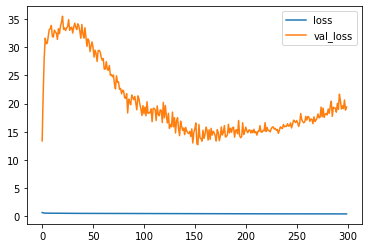

In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluate the Model

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc
from sklearn.metrics import f1_score, precision_score 
from sklearn import metrics

In [59]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [62]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       405
           1       0.00      0.00      0.00       599

    accuracy                           0.40      1004
   macro avg       0.20      0.50      0.29      1004
weighted avg       0.16      0.40      0.23      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print(confusion_matrix(y_test, classes_x))

[[405   0]
 [599   0]]


### Model with early stop and drop out

In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [293]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience=25)

In [294]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dropout(0.2)) # 50% of neruals randomly turn off

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.2))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Fit the model

In [295]:
model.fit(x=X_train, y=y_train, epochs = 500 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/500
126/126 [==============================] - 1s 1ms/step - loss: 0.6264 - val_loss: 12.5528
Epoch 2/500
126/126 [==============================] - 0s 850us/step - loss: 0.5923 - val_loss: 16.9546
Epoch 3/500
126/126 [==============================] - 0s 851us/step - loss: 0.5708 - val_loss: 18.4175
Epoch 4/500
126/126 [==============================] - 0s 842us/step - loss: 0.5595 - val_loss: 18.5603
Epoch 5/500
126/126 [==============================] - 0s 849us/step - loss: 0.5456 - val_loss: 18.9962
Epoch 6/500
126/126 [==============================] - 0s 815us/step - loss: 0.5434 - val_loss: 19.9870
Epoch 7/500
126/126 [==============================] - 0s 808us/step - loss: 0.5387 - val_loss: 20.5500
Epoch 8/500
126/126 [==============================] - 0s 811us/step - loss: 0.5384 - val_loss: 21.6585
Epoch 9/500
126/126 [==============================] - 0s 794us/step - loss: 0.5335 - val_loss: 21.5085
Epoch 10/500
126/126 [==============================] - 0s 802us/s

<AxesSubplot:>

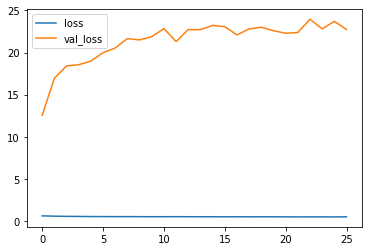

In [296]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Evaluate the model

In [297]:
predict_x=model.predict(X_test) 
classes=np.argmax(predict_x,axis=1)

In [298]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       405
           1       0.00      0.00      0.00       599

    accuracy                           0.40      1004
   macro avg       0.20      0.50      0.29      1004
weighted avg       0.16      0.40      0.23      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix

In [299]:
print(confusion_matrix(y_test, classes))

[[405   0]
 [599   0]]


#### Roc_auc Score

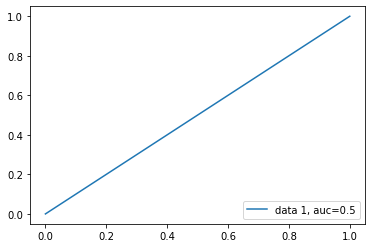

In [290]:
fpr, tpr, _ = metrics.roc_curve(y_test,  classes)
auc = metrics.roc_auc_score(y_test, classes)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### F1 & Precision Score

In [291]:
metrics.f1_score(y_test, classes, labels=np.unique(classes))

0.0

In [292]:
metrics.precision_score(y_test, classes, labels = np.unique(classes))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [124]:
print(confusion_matrix(y_test, prediction))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, prediction))

[[ 50 355]
 [ 12 587]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.81      0.12      0.21       405
           1       0.62      0.98      0.76       599

    accuracy                           0.63      1004
   macro avg       0.71      0.55      0.49      1004
weighted avg       0.70      0.63      0.54      1004



#### ROC_AUC

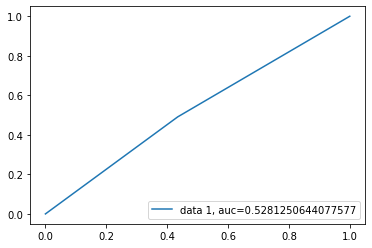

In [248]:
fpr, tpr, _ = metrics.roc_curve(y_test,  dtree_pred)
auc = metrics.roc_auc_score(y_test, dtree_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### F1 & Precision Score

In [ ]:
metrics.f1_score(y_test, dtree_pred, labels=np.unique(dtree_pred))

metrics.precision_score(y_test, prediction, labels=np.unique(dtree_pred))



## Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [208]:
rfc_pred = rfc.predict(X_test)

In [209]:
print('Confusion Matrix--->')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, rfc_pred))

Confusion Matrix--->
[[361  44]
 [514  85]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.41      0.89      0.56       405
           1       0.66      0.14      0.23       599

    accuracy                           0.44      1004
   macro avg       0.54      0.52      0.40      1004
weighted avg       0.56      0.44      0.37      1004



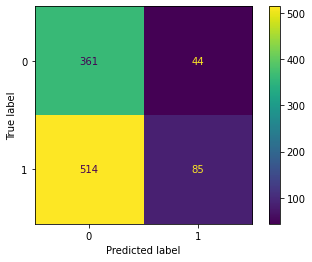

In [353]:

plot_confusion_matrix(rfc, X_test, y_test)

#### ROC_AUC

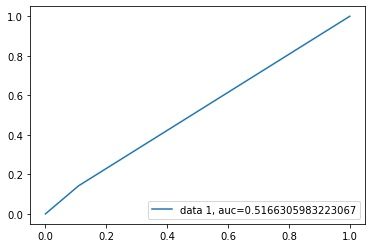

In [226]:

fpr, tpr, _ = metrics.roc_curve(y_test,  rfc_pred)
auc = metrics.roc_auc_score(y_test, rfc_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### F1 & Precision Score

In [250]:
print("F1:", metrics.f1_score(y_test,dtree_pred, labels=np.unique(dtree_pred)))

print("Precision:", metrics.precision_score(y_test, dtree_pred, labels=np.unique(dtree_pred)))

F1: 0.5500467726847521
Precision: 0.625531914893617


### Random Forest with Cross_validation

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}
    

cv = GridSearchCV(rfc, parameters, cv = 5)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=600),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [80]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [81]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 100}


0.725 + or -0.012 for the {'max_depth': 2, 'n_estimators': 5}
0.737 + or -0.009 for the {'max_depth': 2, 'n_estimators': 10}
0.737 + or -0.007 for the {'max_depth': 2, 'n_estimators': 50}
0.738 + or -0.007 for the {'max_depth': 2, 'n_estimators': 100}
0.736 + or -0.005 for the {'max_depth': 2, 'n_estimators': 250}
0.738 + or -0.005 for the {'max_depth': 4, 'n_estimators': 5}
0.742 + or -0.009 for the {'max_depth': 4, 'n_estimators': 10}
0.742 + or -0.007 for the {'max_depth': 4, 'n_estimators': 50}
0.741 + or -0.006 for the {'max_depth': 4, 'n_estimators': 100}
0.742 + or -0.006 for the {'max_depth': 4, 'n_estimators': 250}
0.739 + or -0.007 for the {'max_depth': 8, 'n_estimators': 5}
0.75 + or -0.005 for the {'max_depth': 8, 'n_estimators': 10}
0.749 + or -0.005 for the {'max_depth': 8, 'n_estimators': 50}
0.749 + or -0.006 for the {'max_depth': 8, 'n_estimators': 100}
0.75 + or -0.005 for the {'max_depth': 8, 'n_estimators

In [227]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 32) # n_estimators = 5
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[346  59]
 [498 101]]
              precision    recall  f1-score   support

           0       0.41      0.85      0.55       405
           1       0.63      0.17      0.27       599

    accuracy                           0.45      1004
   macro avg       0.52      0.51      0.41      1004
weighted avg       0.54      0.45      0.38      1004



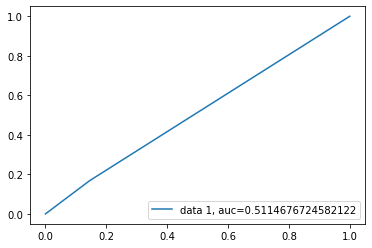

In [228]:
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_pred)
auc = metrics.roc_auc_score(y_test, rf_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### F1 & Precision Score

In [251]:
print("F1:", metrics.f1_score(y_test,rf_pred, labels=np.unique(rf_pred)))

print("Precision:", metrics.precision_score(y_test, rf_pred, labels=np.unique(rf_pred)))

F1: 0.26613965744400525
Precision: 0.63125


### Random Forest with Bagging Classifier

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [230]:
# Pipeline Estimator
pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier())

# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# fit the model 
bgclassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('randomforestclassifier',
                                                  RandomForestClassifier())]),
                  max_features=20, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

In [231]:
rf_bg_pred = bgclassifier.predict(X_test)

In [232]:
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.630,  Model training Score: 0.753


In [233]:
confusion_matrix(y_test, rf_bg_pred )

array([[ 65, 340],
       [ 31, 568]])

In [234]:
print(classification_report(y_test, rf_bg_pred))

              precision    recall  f1-score   support

           0       0.68      0.16      0.26       405
           1       0.63      0.95      0.75       599

    accuracy                           0.63      1004
   macro avg       0.65      0.55      0.51      1004
weighted avg       0.65      0.63      0.55      1004



#### Roc_Auc

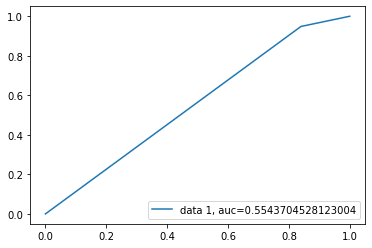

In [235]:
fpr, tpr, _ = metrics.roc_curve(y_test, rf_bg_pred)
auc = metrics.roc_auc_score(y_test, rf_bg_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### F1 & Precision Score

In [139]:
metrics.f1_score(y_test,rf_bg_pred, labels=np.unique(rf_bg_pred))

0.7618429591174561

In [140]:
metrics.precision_score(y_test,rf_bg_pred, labels=np.unique(rf_bg_pred))

0.6231422505307855

### Building Models with SMOTE Sampling

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [38]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<AxesSubplot:>

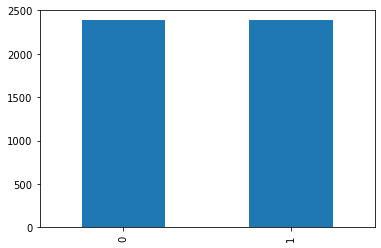

In [39]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

### Decision Tree

In [261]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train_new, y_train_new)
predtion = dtree1.predict(X_test)

In [262]:
confusion_matrix(y_test, predtion)
print(classification_report(y_test, predtion))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51       405
           1       0.64      0.49      0.56       599

    accuracy                           0.53      1004
   macro avg       0.54      0.55      0.53      1004
weighted avg       0.56      0.53      0.54      1004



In [263]:
confusion_matrix(y_test, predtion)

array([[243, 162],
       [305, 294]])

In [264]:
print("F1:", metrics.f1_score(y_test,pred, labels=np.unique(predtion)))

print("Precision:", metrics.precision_score(y_test,pred, labels=np.unique(predtion)))

F1: 0.7478152309612983
Precision: 0.5972083748753739


### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [255]:
predictions = logmodel.predict(X_test)

In [256]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       405
           1       0.60      1.00      0.75       599

    accuracy                           0.60      1004
   macro avg       0.80      0.50      0.38      1004
weighted avg       0.76      0.60      0.45      1004



In [257]:
confusion_matrix(y_test, predictions)

array([[  1, 404],
       [  0, 599]])

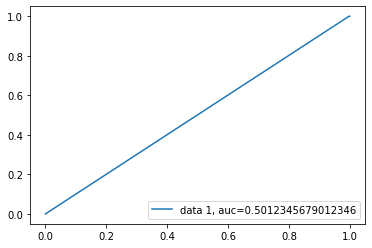

In [258]:

fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# PCA

In [403]:
from sklearn.preprocessing import StandardScaler

In [404]:
scaler = StandardScaler()

In [405]:
scaler.fit(df)

StandardScaler()

In [406]:
scaled_data = scaler.transform(df)

In [407]:
# PCA
from sklearn.decomposition import PCA

In [408]:
pca = PCA(n_components=2)

In [409]:
pca.fit(scaled_data)

PCA(n_components=2)

In [410]:
x_pca = pca.transform(scaled_data)

In [411]:
scaled_data.shape

(5016, 24)

In [412]:
x_pca.shape

(5016, 2)

Text(0, 0.5, 'Second Principle Component')

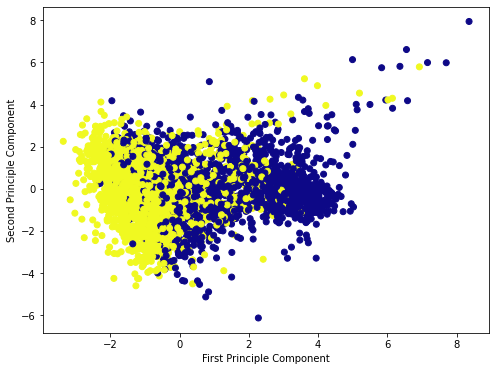

In [413]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['Circulatory System(I)'], cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [414]:
pca.components_

array([[-0.50145307,  0.06803034, -0.50150076, -0.14423189, -0.0728999 ,
        -0.1370717 , -0.26592126,  0.29098992, -0.02266174,  0.01629588,
        -0.35276492, -0.10751361, -0.10161765, -0.0905095 , -0.09280985,
        -0.16500818,  0.18328411,  0.12349726,  0.14310967, -0.11717119,
         0.02107762, -0.08847872,  0.02929406,  0.09376936],
       [-0.18821231,  0.03384422, -0.18864693,  0.33328098,  0.09569884,
         0.17536374,  0.04398333, -0.1074456 , -0.08837645,  0.06556059,
        -0.03336689,  0.30494795,  0.15277886, -0.06550691, -0.414086  ,
         0.18127481, -0.05543657,  0.1820243 ,  0.21123505,  0.40192299,
        -0.27240509,  0.17381148, -0.19501708, -0.20096392]])

In [415]:
df_comp = pd.DataFrame(pca.components_, columns = df.columns)

<AxesSubplot:>

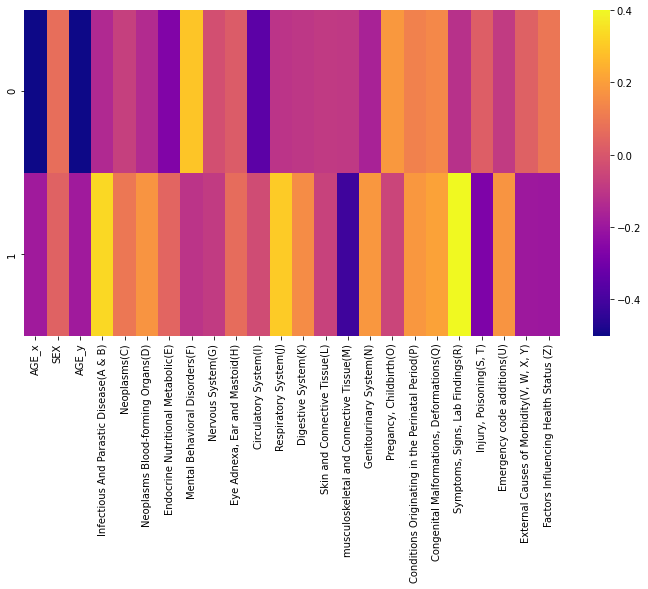

In [416]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap = 'plasma')

In [390]:
scaler = StandardScaler()

In [391]:
scaler.fit(X_train)

StandardScaler()

In [392]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [394]:
pca = PCA(n_components=4)

In [395]:
pca.fit(X_train)

PCA(n_components=4)

In [396]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Logistic Regression with PCA

In [397]:

log = LogisticRegression()

In [398]:
log.fit(X_train, y_train)

LogisticRegression()

In [399]:
pred = log.predict(X_test)

In [400]:
confusion_matrix(y_test, pred)

array([[  7, 398],
       [  1, 598]])

In [401]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.02      0.03       405
           1       0.60      1.00      0.75       599

    accuracy                           0.60      1004
   macro avg       0.74      0.51      0.39      1004
weighted avg       0.71      0.60      0.46      1004



#### F1 & Precision Score

In [288]:
print("F1:", metrics.f1_score(y_test,pred, labels=np.unique(pred)))

print("Precision:", metrics.precision_score(y_test,pred, labels=np.unique(pred)))

F1: 0.7478152309612983
Precision: 0.5972083748753739


#### ROC_AUC Score

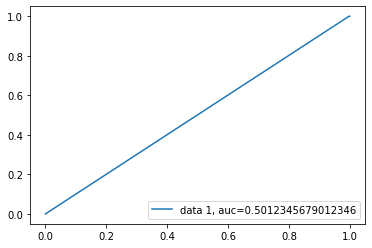

In [289]:

fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random forest with PCA

In [354]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train, y_train)
rf_pca_pred  = rf_pca.predict(X_test)


In [356]:
print(confusion_matrix(y_test, rf_pca_pred))
print(classification_report(y_test, rf_pca_pred))

[[359  46]
 [508  91]]
              precision    recall  f1-score   support

           0       0.41      0.89      0.56       405
           1       0.66      0.15      0.25       599

    accuracy                           0.45      1004
   macro avg       0.54      0.52      0.41      1004
weighted avg       0.56      0.45      0.38      1004



### Decision Tree

In [363]:
tree_pca = DecisionTreeClassifier()
tree_pca.fit(X_train, y_train)
tree_pca_pred = tree_pca.predict(X_test)

In [364]:
print(confusion_matrix(y_test, tree_pca_pred))
print(classification_report(y_test, tree_pca_pred))

[[188 217]
 [195 404]]
              precision    recall  f1-score   support

           0       0.49      0.46      0.48       405
           1       0.65      0.67      0.66       599

    accuracy                           0.59      1004
   macro avg       0.57      0.57      0.57      1004
weighted avg       0.59      0.59      0.59      1004



## Plots all the confusion matrix

#### Random Forest

Text(0.5, 1.0, 'PCA')

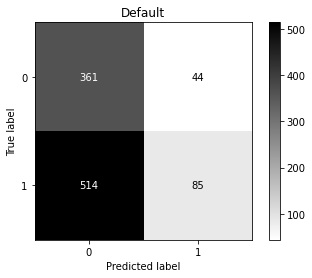

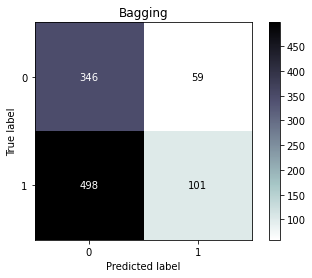

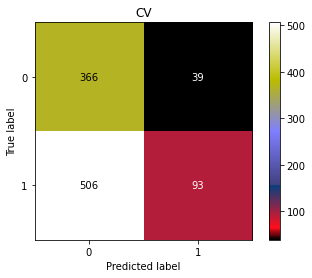

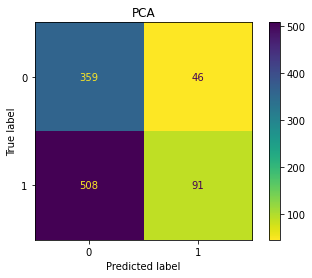

In [361]:
plt.figsize = (10, 7)
plot_confusion_matrix(rfc, X_test, y_test,cmap='binary')
plt.title('Default')
plot_confusion_matrix(rf, X_test, y_test,cmap='bone_r')
plt.title('Bagging')
plot_confusion_matrix(cv, X_test, y_test,cmap='gist_stern')
plt.title('CV')
plot_confusion_matrix(rf_pca, X_test, y_test,cmap='viridis_r')
plt.title('PCA')

#### Decision Tree

Text(0.5, 1.0, 'PCA')

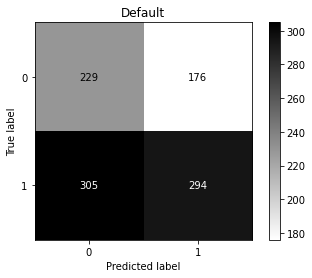

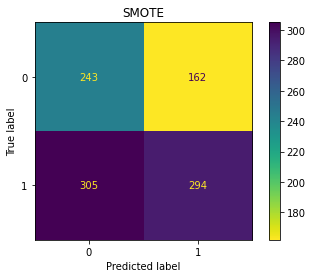

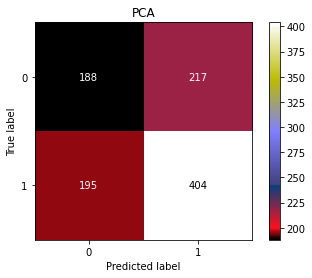

In [366]:
plt.figsize = (10, 7)
plot_confusion_matrix(dtree, X_test, y_test,cmap='binary')
plt.title('Default')
plot_confusion_matrix(dtree1, X_test, y_test,cmap='viridis_r')
plt.title('SMOTE')
plot_confusion_matrix(tree_pca, X_test, y_test,cmap='gist_stern')
plt.title('PCA')

### Logistic Regression

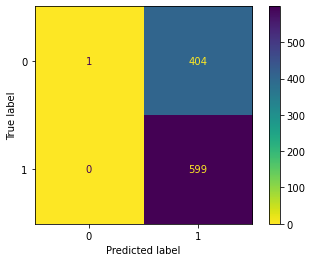

In [370]:
plt.figsize = (10, 7)
plot_confusion_matrix(log, X_test, y_test,cmap='viridis_r')